# Asteroid
All data was taken from this NASA repository [HERE](https://ssd.jpl.nasa.gov/sbdb_query.cgi) \
This project tries to predict the asteroid' diameter given variables such as their luminosity, albedo, etc.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
asteroids = pd.read_csv("Asteroid_Updated.csv",sep=',',dtype={"H": float});

c:\users\jorge\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Some data cleaning

In [14]:
asteroids.columns = asteroids.columns.str.replace(' ', '')

In [21]:
asteroids["diameter"] = asteroids["diameter"].str.rstrip()

In [27]:
asteroids["diameter"]= pd.to_numeric(asteroids["diameter"], downcast='float')

In [28]:
asteroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        24404 non-null   float32
 16  extent          18 non-null      object 
 17  albedo    

## Definitions

1. a:= Semi-major axis (au)
2. e:= Eccentricity
3. i:= Inclication with respect to the x-y ecliptic (deg)
4. om:= Longitude of the ascending node
5. w:= Argument of perihelion
6. q:= Perihelion distance(au)
7. ad:= Aphelion distance(au)
8. per_y:= Orbital period
9. data_arc:=Data arc-span(d)
10. condition_code:= Orbit condition code
11. n_obs_used:= Number of observations used
12. H:= Absolute Magnitude parameter
13. neo:= Near Earth Object
14. pha:= Physically Hazardous Asteroid
15. diameter:= Diameter of asteroid(Km)
16. extent:= Object bi/tri axial ellipsoid dimensions(Km)
17. albedo:= geometric albedo
18. rot_per:= Rotation Period(h)
19. GM:= Standard gravitational parameter, Product of mass and gravitational constant
20. BV:= Color index B-V magnitude difference
21. UB:= Color index U-B magnitude difference
22. IR:= Color index I-R magnitude difference
23. spec_B:= Spectral taxonomic type(SMASSII)
24. spec_T:= Spectral taxonomic type(Tholen)
25. G:= Magnitude slope parameter
26. moid:= Earth Minimum orbit Intersection Distance(au)
27. class:= Asteroid orbit class
28. n:= Mean motion(deg/d)
29. per:= Orbital Period(d)
30. ma:= Mean anomaly(deg)

## Data visualization

Correlation between variables:

In [52]:
asteroids["class"].value_counts()

MBA    747420
OMB     24715
IMB     17552
MCA     17354
APO     11759
AMO      8020
TJN      7385
TNO      3310
ATE      1601
CEN       488
AST        84
IEO        20
HYA         4
PAA         2
Name: class, dtype: int64

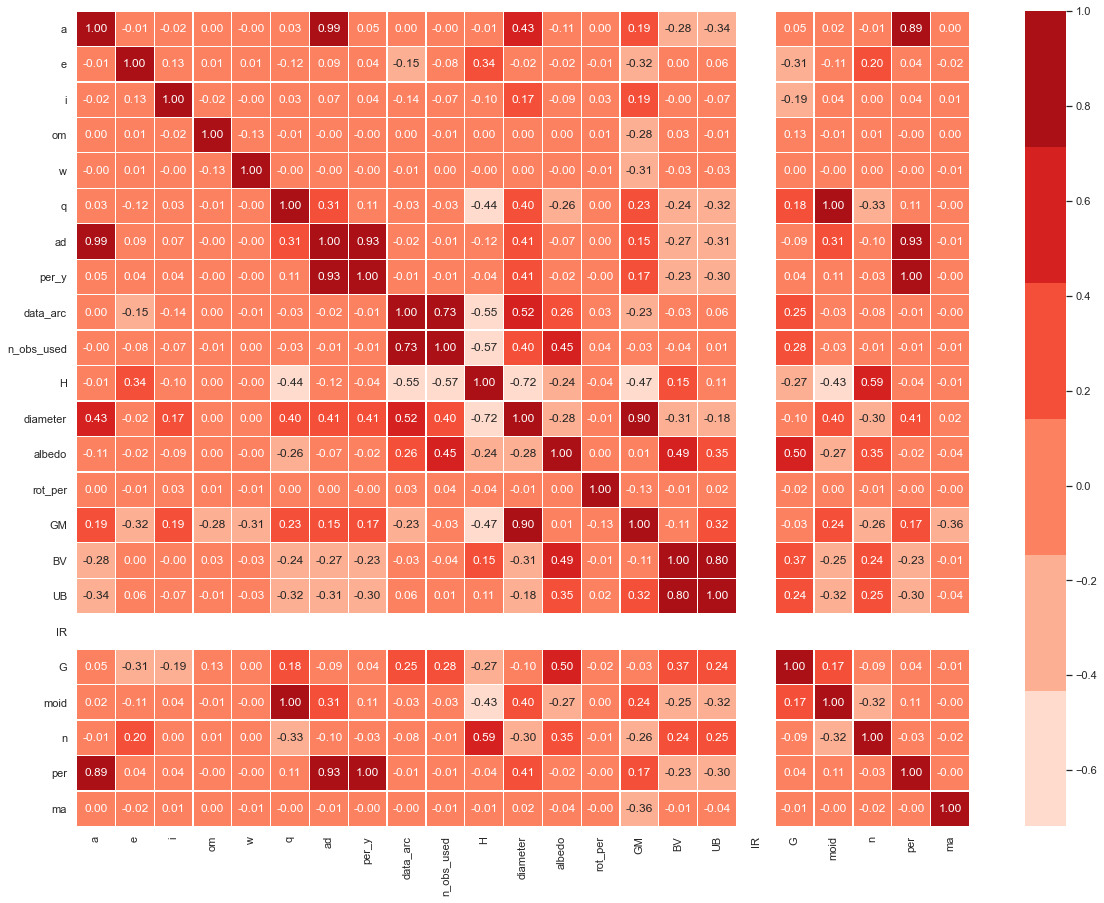

In [30]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(asteroids.corr(), annot=True, linecolor='white',linewidths=.3, fmt='.2f', cbar=True, cmap=(sns.color_palette("Reds")))

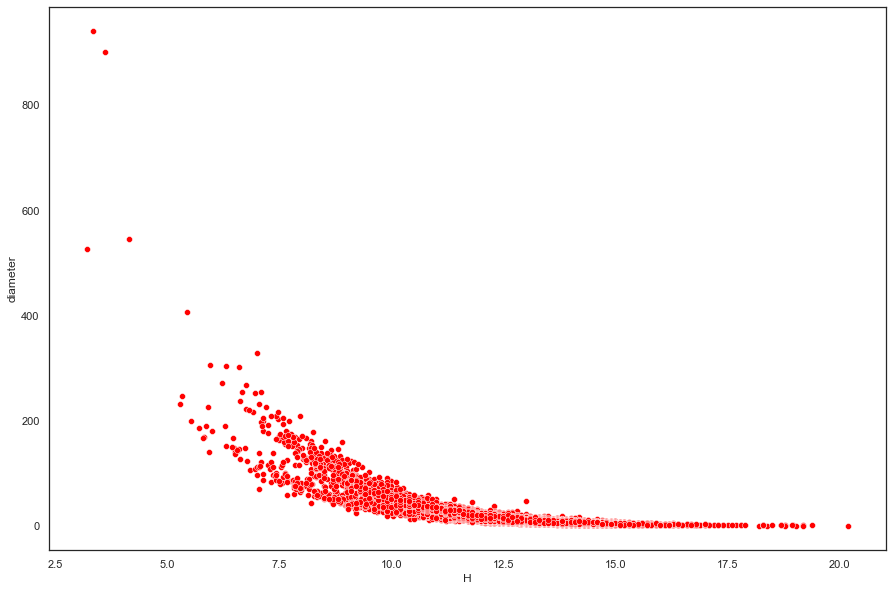

In [40]:
plt.figure(figsize=(15,10))
sns.set(style="white")
sns.scatterplot(x="H", y="diameter", data=asteroids, color="red")

The graph from above tell us that the the diameter of an asteroid is proportional inverse to its absolute magnitud which is the luminosity of a celestial object, this makes sense, given that for tiny asteroids it is difficult for our telescopes to detect any reflection of light.

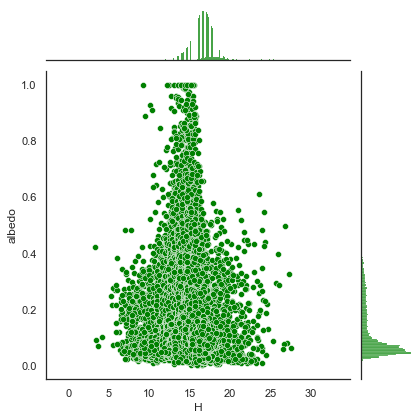

In [42]:
sns.set(style="white")

sns.jointplot(x="H", y="albedo", data=asteroids, color="green")

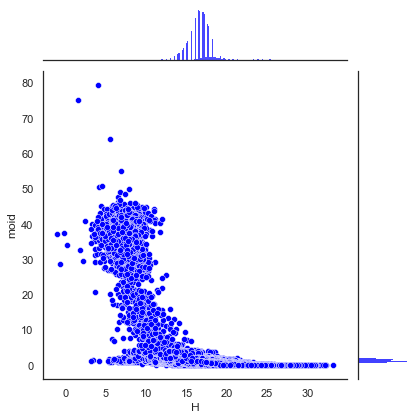

In [51]:
sns.set(style="white")

sns.jointplot(x="H", y="moid", data=asteroids, color="blue")